In [20]:
from RepKit.dataset import rnn
networks = rnn.flow("data/baseline/").get_dataloader(batch_size=None, shuffle=False, num_workers=0)

print(f"Found {len(networks)} networks")

# Checking shape of the networks
for idx, (x,y) in enumerate(networks): print("Network:", idx, x.shape, y.shape)

Found 4 networks
Network: 0 torch.Size([4, 50, 200, 300]) torch.Size([4, 50])
Network: 1 torch.Size([4, 50, 200, 300]) torch.Size([4, 50])
Network: 2 torch.Size([4, 50, 200, 300]) torch.Size([4, 50])
Network: 3 torch.Size([4, 50, 200, 300]) torch.Size([4, 50])


In [ ]:
# Model metrc wants:
#   models x samples x features 
#   -> models x models

# Sample metrc wants:
#   samples x features 
#   -> samples x samples

In [1]:
from RepKit.dataset import rnn
networks = rnn.flow("data/experimental", preprocess="avg_neurons")
for idx, (x,y) in enumerate(networks): print("Network:", idx, x.shape, y.shape)

Network: 0 (200, 300) (200,)
Network: 1 (200, 300) (200,)
Network: 2 (200, 300) (200,)
Network: 3 (200, 300) (200,)


In [3]:
from RepKit.metric import model_metric

metric = model_metric()
metric.measure(networks, "cosine")
metric.distances

100%|██████████| 6/6.0 [00:06<00:00,  1.13s/it]


array([[0.        , 0.00325282, 0.00248244, 0.00320814],
       [0.00325282, 0.        , 0.00168326, 0.00242302],
       [0.00248244, 0.00168326, 0.        , 0.00248355],
       [0.00320814, 0.00242302, 0.00248355, 0.        ]])

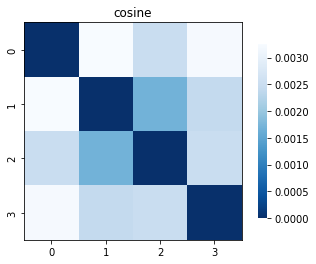

In [4]:
metric.plot()

In [1]:
from RepKit.dataset import rnn
networks = rnn.flow("data/experimental", preprocess="avg_neurons")
for idx, (x,y) in enumerate(networks): print("Network:", idx, x.shape, y.shape)

Network: 0 (200, 300) (200,)
Network: 1 (200, 300) (200,)
Network: 2 (200, 300) (200,)
Network: 3 (200, 300) (200,)


100%|██████████| 6/6 [01:18<00:00, 13.00s/it]


[[ 0.          7.26581744  6.41511656  3.66700343]
 [ 7.26581744  0.         12.21112571  8.2295299 ]
 [ 6.41511656 12.21112571  0.          4.10413208]
 [ 3.66700343  8.2295299   4.10413208  0.        ]]


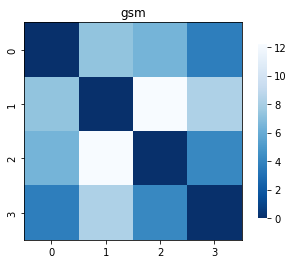

In [2]:
from RepKit.metric import model_metric

metric = model_metric()
metric.measure(networks, "gsm")
print(metric.distances)
metric.plot()

for network 0| class 0 | found:  100 samples
for network 0| class 1 | found:  100 samples
for network 1| class 0 | found:  100 samples
for network 1| class 1 | found:  100 samples
for network 2| class 0 | found:  99 samples
for network 2| class 1 | found:  101 samples
for network 3| class 0 | found:  101 samples
for network 3| class 1 | found:  99 samples
Minimum samples per class over all networks found: 99
Succesfully sliced the networks: (2, 99, 300)


100%|██████████| 6/6 [01:00<00:00, 10.08s/it]

[[0.         2.64793672 2.54202197 1.49757518]
 [2.64793672 0.         4.342256   3.37774192]
 [2.54202197 4.342256   0.         1.93657936]
 [1.49757518 3.37774192 1.93657936 0.        ]]


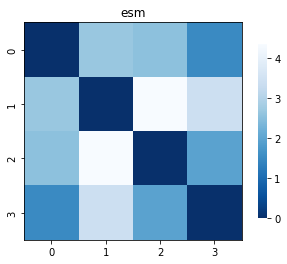

In [3]:
from RepKit.metric import model_metric

metric = model_metric()
metric.measure(networks, "esm")
print(metric.distances)
metric.plot()

In [13]:
# import RepKit.decomposer as decomposer
from RepKit.decomposer import mds
engine = mds()
engine.decompose(components = 2, distances = metric.distances)
engine.plot(labels=[ 1, 5, 10, 0 ])

In [1]:
from RepKit.dataset import rnn
networks = rnn.flow("data/experimental", preprocess="avg_neurons")

/home/rudra/.local/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


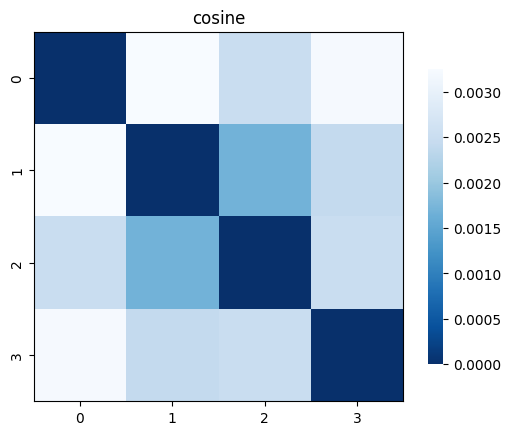

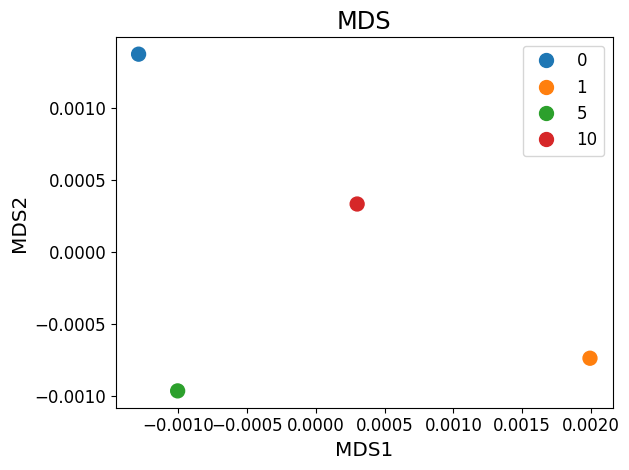

In [4]:
from RepKit.space import model_space
space = model_space()
space.measure(networks, "cosine").plot_distance().decompose(components = 2, engine="mds").plot_embedding(labels=[ 1, 5, 10, 0 ])

In [ ]:
# braycurtis
# canberra
# chebyshev
# cityblock
# correlation
# cosine
# dice
# euclidean
# hamming
# jaccard
# jensenshannon
# kulczynski1
# mahalanobis
# matching
# minkowski
# rogerstanimoto
# russellrao
# seuclidean
# sokalmichener
# sokalsneath
# sqeuclidean
# yule

In [2]:
# data = np.array([x for x,_ in networks])
# data.shape

In [1]:
from RepKit.dataset import rnn
import numpy as np

networks = rnn.flow("data/experimental", preprocess="time_facing")
xt, _ = networks[0]
networks = rnn.register(xt, None)

from RepKit.space import model_space
space = model_space()

space.measure(networks, "cosine").decompose(components = 2, engine="mds")

100%|██████████| 44850/44850.0 [01:00<00:00, 737.84it/s]


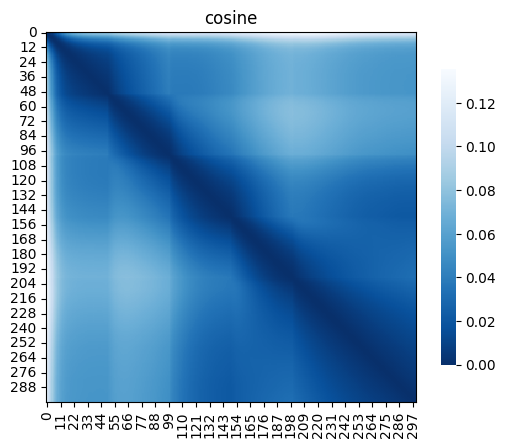

In [2]:
space.plot_distance()

/home/rudra/.local/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


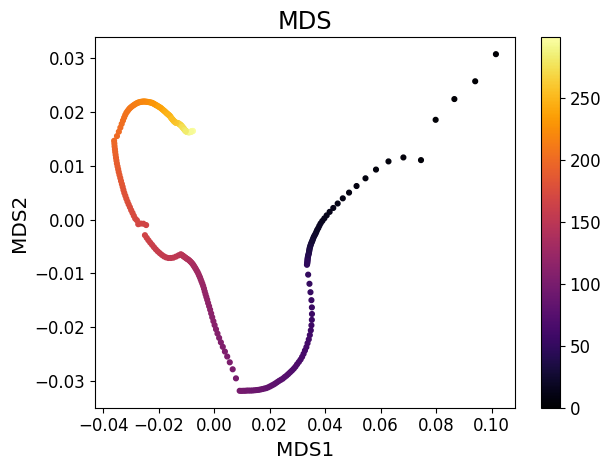

In [6]:
space.plot_embedding(labels=list(np.arange(0, 300, 1)))

In [5]:
from RepKit.dataset import rnn
import numpy as np

networks = rnn.flow("data/experimental", preprocess="time_facing")
xt, _ = networks[0]
networks = rnn.register(xt, None)

from RepKit.space import model_space
space = model_space()
space.measure(networks, "euclidean").decompose(components = 2, engine="mds")

100%|██████████| 44850/44850.0 [00:55<00:00, 802.66it/s]


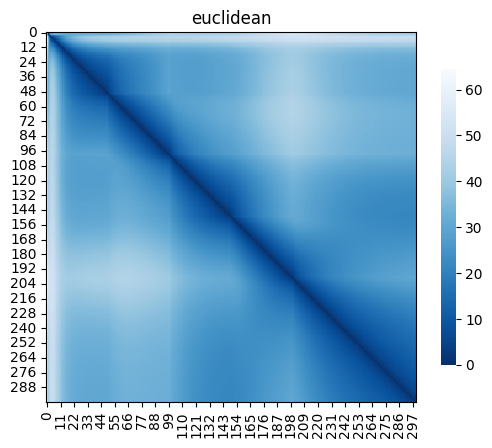

In [6]:
space.plot_distance()

In [ ]:
from RepKit.dataset import rnn
import numpy as np

networks = rnn.flow("data/experimental", preprocess="time_facing")
xt, _ = networks[0]
networks = rnn.register(xt, None)

from RepKit.space import model_space
space = model_space()
space.measure(networks, "dice").decompose(components = 2, engine="mds")

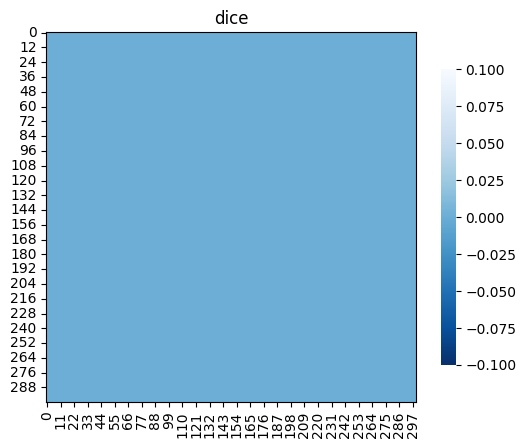

In [2]:
space.plot_distance()

In [3]:
from RepKit.dataset import rnn
import numpy as np

networks = rnn.flow("data/experimental", preprocess="time_facing")
xt, _ = networks[0]
networks = rnn.register(xt, None)

from RepKit.space import model_space
space = model_space()
space.measure(networks, "jaccard").decompose(components = 2, engine="mds")

100%|██████████| 44850/44850.0 [01:07<00:00, 668.86it/s]


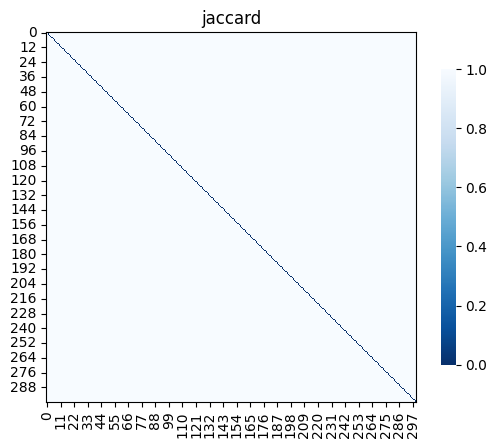

In [4]:
space.plot_distance()

In [1]:
from RepKit.dataset import rnn
networks = rnn.flow("data/experimental", preprocess="avg_neurons")

In [ ]:
rnn.register(networks[0][0], None)

In [ ]:
from RepKit.dataset import rnn
networks = rnn.flow("data/experimental", preprocess="avg_neurons")

from RepKit.space import model_space
space = model_space()
space.measure(networks, "cosine").plot_distance().decompose(components = 2, engine="mds").plot_embedding(labels=[ 1, 5, 10, 0 ])